## 1. Dependancy Installation

In [1]:
# %pip install tensorflow_version 1.x
# %pip install --upgrade h5py==2.10.0
# %pip install opencv-python
import sys
sys.path.append("../") # go to parent dir
from mrcnn_n import *
from mrcnn_n.visualize import random_colors, get_mask_contours, draw_mask
from mrcnn_n import *
import cv2
%matplotlib inline

## 2. Run Mask-RCNN on Images


In [2]:
# Load Image

# train_annotations_path = "../dataset/lc_dataset_v6/train.json"
# val_annotations_path = "../dataset/lc_dataset_v6/test.json"

# dataset_train = load_image_dataset(os.path.join( train_annotations_path), "../dataset/lc_dataset_v6/train", "train")
# dataset_val = load_image_dataset(os.path.join( val_annotations_path), "../dataset/lc_dataset_v6/test", "test")
# class_number = dataset_train.count_classes()

# print("Classes: {}".format(class_number))

In [6]:
import cv2
from mrcnn_n.m_rcnn import load_inference_model
img = cv2.imread("../assets/output/masdetection_image.png")

test_model, inference_config = load_inference_model(1, "../model/lung_cancer/lc_model_v6.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Loading weights from  ../model/lung_cancer/lc_model_v6.h5


contours====> [array([[138, 281],
       [137, 281],
       [137, 280],
       [136, 280],
       [135, 280],
       [134, 280],
       [134, 279],
       [134, 278],
       [134, 277],
       [134, 276],
       [134, 275],
       [135, 274],
       [135, 274],
       [136, 273],
       [136, 273],
       [136, 272],
       [137, 271],
       [137, 271],
       [138, 270],
       [138, 270],
       [138, 269],
       [139, 268],
       [139, 268],
       [140, 267],
       [141, 267],
       [141, 267],
       [142, 266],
       [143, 266],
       [143, 266],
       [144, 265],
       [145, 265],
       [146, 265],
       [147, 265],
       [148, 265],
       [149, 265],
       [150, 265],
       [151, 265],
       [152, 265],
       [152, 266],
       [153, 266],
       [153, 267],
       [154, 267],
       [154, 268],
       [154, 269],
       [154, 270],
       [154, 271],
       [154, 272],
       [154, 273],
       [154, 274],
       [154, 275],
       [154, 275],
       [153, 275

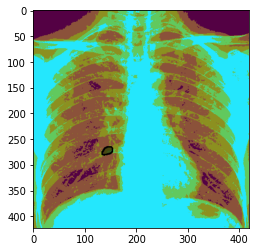

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    print("contours====>",contours)
    for cnt in contours:
        print("cnt====>",[cnt])
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
# cv2.Waitkey(10000)
# cv2.imshow("img",img)
plt.imsave("step1_lc_output.png", img)
plt.imshow(img)
plt.show()
# print(image)

In [ ]:
arr=[[100,575],[150,575],[200,575],[923, 575],[924, 575]]
# for k in range(len(arr)):
#     # print(arr[k])
json = []
#bulb array
for l in range(len(arr)):
    #polygon array
    for i in range(len(array)):
        for j in range(len(array[i])):
            for k in range(len(array[i][j])):
                # print(array[i][j][k])
                if(arr[l][1]== array[i][j][k][1]):
                    if(arr[l][0]== array[i][j][k][0]):
                        # print(arr[l])
                        json.append(arr[l])
print("json==>",json)
#check duplicate cordinates
bulb_arr = []
for i in range(len(arr)):
    for j in range(len(json)):
        if(arr[i]==json[j]):
            bulb_arr.append(i)
            print(i)
                    

                # print(array[i][j][k])

            # if(arr[l][2]= )
            # print(len(array[i]))
            # print(array[i][j])
dre= []
for i in range(0, len(bulb_arr)):  
    for j in range(i+1, len(bulb_arr)):  
        if(bulb_arr[i] == bulb_arr[j]):  
            print(bulb_arr[j]);  
            dre.append(bulb_arr[j])
mylist = ["a", "b", "b", "c", "a"]
mylist = sorted(set(bulb_arr))
print(set(mylist))

## 3. Model Summary

In [5]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 30 images. Increase for better accuracy.
from model_accuracy import *

model_accuracy(dataset_train, dataset_val, test_model, inference_config, modellib,utils)

ModuleNotFoundError: No module named 'model_accuracy'

In [ ]:
print(test_model.keras_model.summary())

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

: 